In [31]:
# Krok 1: Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfiguracja wy≈õwietlania
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Analiza EDA - Idealny Pies")
print("Wszystkie biblioteki za≈Çadowane!")

Analiza EDA - Idealny Pies
Wszystkie biblioteki za≈Çadowane!


In [32]:
# Krok 2: Wczytanie danych o psach
try:
    df = pd.read_csv('dogs_cleaned.csv')
    print(f"Dane wczytane pomy≈õlnie!")
    print(f"Liczba ras: {len(df)}")
    print(f"Liczba cech: {len(df.columns)}")
except FileNotFoundError:
    print("Nie znaleziono pliku dogs_cleaned.csv")
    print("Upewnij siƒô, ≈ºe plik jest w tym samym folderze")

Dane wczytane pomy≈õlnie!
Liczba ras: 391
Liczba cech: 41


In [33]:
# Krok 3: Podstawowe informacje o danych
print("=" * 50)
print("PODSTAWOWE INFORMACJE O DANYCH")
print("=" * 50)

# Wymiary danych
print(f"Kszta≈Çt danych: {df.shape}")
print(f"Liczba ras: {df.shape[0]}")
print(f"Liczba cech: {df.shape[1]}")
print("\n")

# Nazwy kolumn
print("LISTA WSZYSTKICH CECH:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

PODSTAWOWE INFORMACJE O DANYCH
Kszta≈Çt danych: (391, 41)
Liczba ras: 391
Liczba cech: 41


LISTA WSZYSTKICH CECH:
 1. Breed Name
 2. Detailed Description Link
 3. Dog Size
 4. Dog Breed Group
 5. Height
 6. Avg. Height, cm
 7. Weight
 8. Avg. Weight, kg
 9. Life Span
10. Avg. Life Span, years
11. Adaptability
12. Adapts Well To Apartment Living
13. Good For Novice Owners
14. Sensitivity Level
15. Tolerates Being Alone
16. Tolerates Cold Weather
17. Tolerates Hot Weather
18. All Around Friendliness
19. Affectionate With Family
20. Kid-Friendly
21. Dog Friendly
22. Friendly Toward Strangers
23. Health And Grooming Needs
24. Amount Of Shedding
25. Drooling Potential
26. Easy To Groom
27. General Health
28. Potential For Weight Gain
29. Size
30. Trainability
31. Easy To Train
32. Intelligence
33. Potential For Mouthiness
34. Prey Drive
35. Tendency To Bark Or Howl
36. Wanderlust Potential
37. Physical Needs
38. Energy Level
39. Intensity
40. Exercise Needs
41. Potential For Playfulness


In [34]:
# Krok 3b: PodglƒÖd pierwszych ras
print("=" * 50)
print("PODGLƒÑD PIERWSZYCH 3 RAS")
print("=" * 50)

# Pierwsze 3 rasy - tylko najwa≈ºniejsze kolumny
important_cols = [
    'Breed Name', 'Dog Size', 'Dog Breed Group', 
    'Adaptability', 'All Around Friendliness', 
    'Energy Level', 'Exercise Needs'
]

print(df[important_cols].head(3).to_string(index=False))

PODGLƒÑD PIERWSZYCH 3 RAS
   Breed Name   Dog Size  Dog Breed Group  Adaptability  All Around Friendliness  Energy Level  Exercise Needs
       Afador Very Large Mixed Breed Dogs           2.4                     3.00             4               4
  Affenhuahua      Small Mixed Breed Dogs           3.0                     3.00             4               3
Affenpinscher      Small   Companion Dogs           3.2                     3.33             4               3


In [35]:
# Krok 3c: Sprawdzenie typ√≥w danych
print("=" * 50)
print("TYPY DANYCH")
print("=" * 50)

# Policz typy
types_count = df.dtypes.value_counts()
print("Rozk≈Çad typ√≥w danych:")
for dtype, count in types_count.items():
    print(f"  {dtype}: {count} kolumn")

print("\nKolumny numeryczne:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"≈ÅƒÖcznie: {len(numeric_cols)} kolumn")
for col in numeric_cols[:10]:  # Poka≈ºemy pierwsze 10
    print(f"  ‚Ä¢ {col}")
if len(numeric_cols) > 10:
    print(f"  ... i jeszcze {len(numeric_cols)-10} innych")

TYPY DANYCH
Rozk≈Çad typ√≥w danych:
  int64: 23 kolumn
  float64: 11 kolumn
  object: 7 kolumn

Kolumny numeryczne:
≈ÅƒÖcznie: 34 kolumn
  ‚Ä¢ Avg. Height, cm
  ‚Ä¢ Avg. Weight, kg
  ‚Ä¢ Avg. Life Span, years
  ‚Ä¢ Adaptability
  ‚Ä¢ Adapts Well To Apartment Living
  ‚Ä¢ Good For Novice Owners
  ‚Ä¢ Sensitivity Level
  ‚Ä¢ Tolerates Being Alone
  ‚Ä¢ Tolerates Cold Weather
  ‚Ä¢ Tolerates Hot Weather
  ... i jeszcze 24 innych


In [37]:
# Krok 4: Sprawdzenie brak√≥w danych (missing values)
print("=" * 50)
print("ANALIZA BRAK√ìW DANYCH")
print("=" * 50)

# Og√≥lne statystyki brak√≥w
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
missing_percentage = (missing_cells / total_cells) * 100

print(f"Og√≥lne statystyki:")
print(f"  ‚Ä¢ Ca≈Çkowita liczba kom√≥rek: {total_cells:,}")
print(f"  ‚Ä¢ Kom√≥rki z brakami: {missing_cells:,}")
print(f"  ‚Ä¢ Procent brak√≥w: {missing_percentage:.2f}%")
print()

# Braki w poszczeg√≥lnych kolumnach
missing_by_column = df.isnull().sum()
columns_with_missing = missing_by_column[missing_by_column > 0]

if len(columns_with_missing) > 0:
    print(f"Kolumny z brakami danych ({len(columns_with_missing)} kolumn):")
    for col, missing_count in columns_with_missing.items():
        missing_percent = (missing_count / len(df)) * 100
        print(f"  ‚Ä¢ {col}: {missing_count} brak√≥w ({missing_percent:.1f}%)")
else:
    print("≈öwietnie! Brak brakujƒÖcych danych!")

ANALIZA BRAK√ìW DANYCH
Og√≥lne statystyki:
  ‚Ä¢ Ca≈Çkowita liczba kom√≥rek: 16,031
  ‚Ä¢ Kom√≥rki z brakami: 3
  ‚Ä¢ Procent brak√≥w: 0.02%

Kolumny z brakami danych (3 kolumn):
  ‚Ä¢ Drooling Potential: 1 brak√≥w (0.3%)
  ‚Ä¢ Prey Drive: 1 brak√≥w (0.3%)
  ‚Ä¢ Tendency To Bark Or Howl: 1 brak√≥w (0.3%)


In [38]:
# Krok 4b: Sprawdzenie duplikat√≥w i jako≈õci
print("=" * 50)
print("JAKO≈öƒÜ DANYCH")
print("=" * 50)

# Duplikaty
duplicates = df.duplicated().sum()
print(f"Duplikaty:")
print(f"  ‚Ä¢ Zduplikowane wiersze: {duplicates}")

# Sprawd≈∫ unikalne nazwy ras
unique_breeds = df['Breed Name'].nunique()
total_breeds = len(df)
print(f"  ‚Ä¢ Unikalne nazwy ras: {unique_breeds}")
print(f"  ‚Ä¢ Wszystkie rasy: {total_breeds}")

if unique_breeds == total_breeds:
    print("  Ka≈ºda rasa ma unikalnƒÖ nazwƒô!")
else:
    print(f"  Mo≈ºliwe duplikaty nazw: {total_breeds - unique_breeds}")

# Sprawd≈∫ zakresy warto≈õci dla kluczowych cech
print(f"\nZakresy warto≈õci (skala 1-5):")
key_traits = ['Adaptability', 'All Around Friendliness', 'Trainability', 
              'Physical Needs', 'Energy Level']

for trait in key_traits:
    if trait in df.columns:
        min_val = df[trait].min()
        max_val = df[trait].max()
        print(f"  ‚Ä¢ {trait}: {min_val:.1f} - {max_val:.1f}")

JAKO≈öƒÜ DANYCH
Duplikaty:
  ‚Ä¢ Zduplikowane wiersze: 0
  ‚Ä¢ Unikalne nazwy ras: 391
  ‚Ä¢ Wszystkie rasy: 391
  Ka≈ºda rasa ma unikalnƒÖ nazwƒô!

Zakresy warto≈õci (skala 1-5):
  ‚Ä¢ Adaptability: 1.6 - 4.4
  ‚Ä¢ All Around Friendliness: 1.0 - 5.0
  ‚Ä¢ Trainability: 1.8 - 4.8
  ‚Ä¢ Physical Needs: 1.7 - 5.0
  ‚Ä¢ Energy Level: 1.0 - 5.0


In [39]:
# Krok 5: Rozk≈Çady kategorii - Rozmiary ps√≥w
print("=" * 50)
print("ROZK≈ÅAD ROZMIAR√ìW PS√ìW")
print("=" * 50)

# Analiza rozmiar√≥w
size_counts = df['Dog Size'].value_counts()
size_percentages = df['Dog Size'].value_counts(normalize=True) * 100

print("Rozk≈Çad rozmiar√≥w:")
for size, count in size_counts.items():
    percentage = size_percentages[size]
    print(f"  {size:15}: {count:3d} ras ({percentage:5.1f}%)")

print(f"\nNajpopularniejszy rozmiar: {size_counts.index[0]} ({size_counts.iloc[0]} ras)")

ROZK≈ÅAD ROZMIAR√ìW PS√ìW
Rozk≈Çad rozmiar√≥w:
  Very Large     : 207 ras ( 52.9%)
  Medium         :  79 ras ( 20.2%)
  Large          :  65 ras ( 16.6%)
  Small          :  35 ras (  9.0%)
  Very Small     :   5 ras (  1.3%)

Najpopularniejszy rozmiar: Very Large (207 ras)


PIERWSZY WYKRES - ROZMIARY PS√ìW


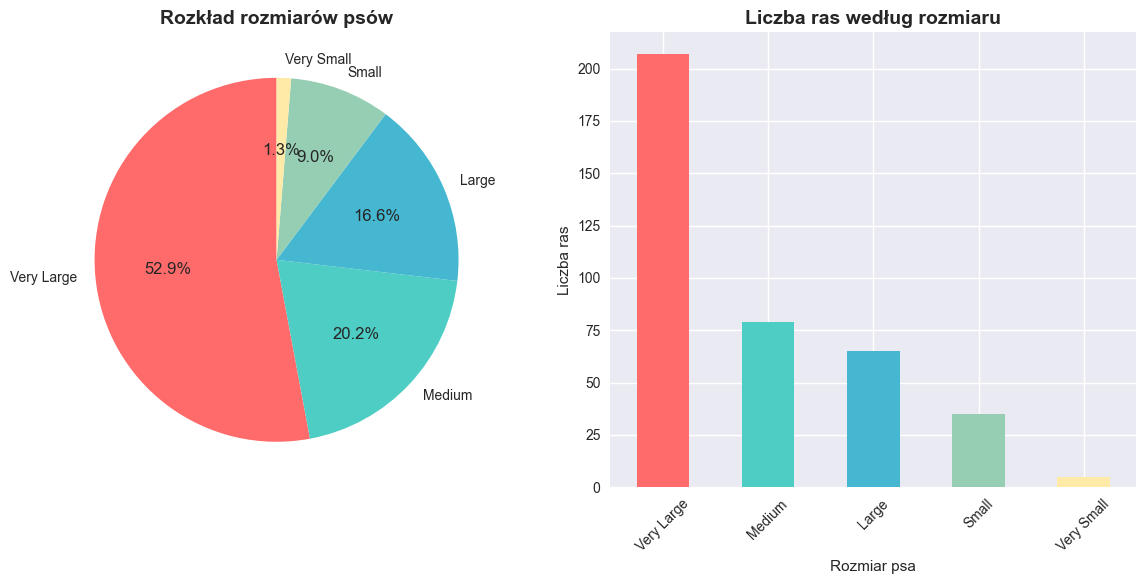

Tw√≥j pierwszy wykres jest gotowy!


In [40]:
# Krok 5c: Wizualizacja rozmiar√≥w ps√≥w
print("=" * 50)
print("PIERWSZY WYKRES - ROZMIARY PS√ìW")
print("=" * 50)

# Ustawienia wykresu
plt.figure(figsize=(12, 6))

# Wykres 1: Rozk≈Çad rozmiar√≥w (pie chart)
plt.subplot(1, 2, 1)
sizes = df['Dog Size'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
plt.pie(sizes.values, labels=sizes.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Rozk≈Çad rozmiar√≥w ps√≥w', fontsize=14, fontweight='bold')

# Wykres 2: Rozk≈Çad rozmiar√≥w (bar chart)
plt.subplot(1, 2, 2)
sizes.plot(kind='bar', color=colors[:len(sizes)])
plt.title('Liczba ras wed≈Çug rozmiaru', fontsize=14, fontweight='bold')
plt.xlabel('Rozmiar psa')
plt.ylabel('Liczba ras')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Tw√≥j pierwszy wykres jest gotowy!")

In [41]:
# Krok 6: Statystyki kluczowych cech ps√≥w
print("=" * 60)
print("STATYSTYKI KLUCZOWYCH CECH PS√ìW (SKALA 1-5)")
print("=" * 60)

# Wybieramy najwa≈ºniejsze cechy
key_traits = [
    'Adaptability',
    'All Around Friendliness', 
    'Trainability',
    'Physical Needs',
    'Energy Level',
    'Exercise Needs',
    'Adapts Well To Apartment Living',
    'Good For Novice Owners',
    'Kid-Friendly',
    'Easy To Train'
]

# Obliczamy statystyki
stats_data = []
for trait in key_traits:
    if trait in df.columns:
        mean_val = df[trait].mean()
        median_val = df[trait].median()
        min_val = df[trait].min()
        max_val = df[trait].max()
        
        stats_data.append({
            'Cecha': trait,
            '≈örednia': round(mean_val, 2),
            'Mediana': round(median_val, 2),
            'Min': round(min_val, 2),
            'Max': round(max_val, 2)
        })
        
        # Interpretacja
        if mean_val >= 4.0:
            level = "WYSOKI"
        elif mean_val >= 3.0:
            level = "≈öREDNI"
        else:
            level = "NISKI"
            
        print(f"{trait:30}: {mean_val:4.2f} {level}")

print(f"\nInterpretacja: wiƒôkszo≈õƒá ps√≥w ma wysokie warto≈õci cech pozytywnych!")

STATYSTYKI KLUCZOWYCH CECH PS√ìW (SKALA 1-5)
Adaptability                  : 2.97 NISKI
All Around Friendliness       : 4.02 WYSOKI
Trainability                  : 3.41 ≈öREDNI
Physical Needs                : 3.79 ≈öREDNI
Energy Level                  : 4.06 WYSOKI
Exercise Needs                : 3.98 ≈öREDNI
Adapts Well To Apartment Living: 2.99 NISKI
Good For Novice Owners        : 2.79 NISKI
Kid-Friendly                  : 4.03 WYSOKI
Easy To Train                 : 3.43 ≈öREDNI

Interpretacja: wiƒôkszo≈õƒá ps√≥w ma wysokie warto≈õci cech pozytywnych!


In [42]:
# Krok 6b: Najwy≈ºsze i najni≈ºsze ≈õrednie
print("=" * 50)
print("TOP 5 NAJWY≈ªSZYCH ≈öREDNICH")
print("=" * 50)

# Oblicz ≈õrednie dla wszystkich cech numerycznych
numeric_cols = df.select_dtypes(include=[np.number]).columns
means = df[numeric_cols].mean().sort_values(ascending=False)

# Top 5 najwy≈ºszych
print("Cechy z najwy≈ºszymi ≈õrednimi:")
for i, (col, mean_val) in enumerate(means.head(5).items(), 1):
    print(f"{i}. {col:30}: {mean_val:.2f}/5")

print("\n" + "=" * 50)
print("TOP 5 NAJNI≈ªSZYCH ≈öREDNICH")
print("=" * 50)

# Top 5 najni≈ºszych
print("Cechy z najni≈ºszymi ≈õrednimi:")
for i, (col, mean_val) in enumerate(means.tail(5).items(), 1):
    print(f"{i}. {col:30}: {mean_val:.2f}/5")

print(f"\nWniosek: Psy sƒÖ generalnie {'przyjazne' if means.iloc[0] > 4 else 'zr√≥≈ºnicowane'}!")

TOP 5 NAJWY≈ªSZYCH ≈öREDNICH
Cechy z najwy≈ºszymi ≈õrednimi:
1. Avg. Height, cm               : 46.80/5
2. Avg. Weight, kg               : 22.05/5
3. Avg. Life Span, years         : 12.59/5
4. Affectionate With Family      : 4.57/5
5. Potential For Playfulness     : 4.27/5

TOP 5 NAJNI≈ªSZYCH ≈öREDNICH
Cechy z najni≈ºszymi ≈õrednimi:
1. Adaptability                  : 2.97/5
2. Size                          : 2.92/5
3. Good For Novice Owners        : 2.79/5
4. Tolerates Being Alone         : 2.08/5
5. Drooling Potential            : 1.81/5

Wniosek: Psy sƒÖ generalnie przyjazne!


WYKRES PUDE≈ÅKOWY - ROZK≈ÅADY CECH


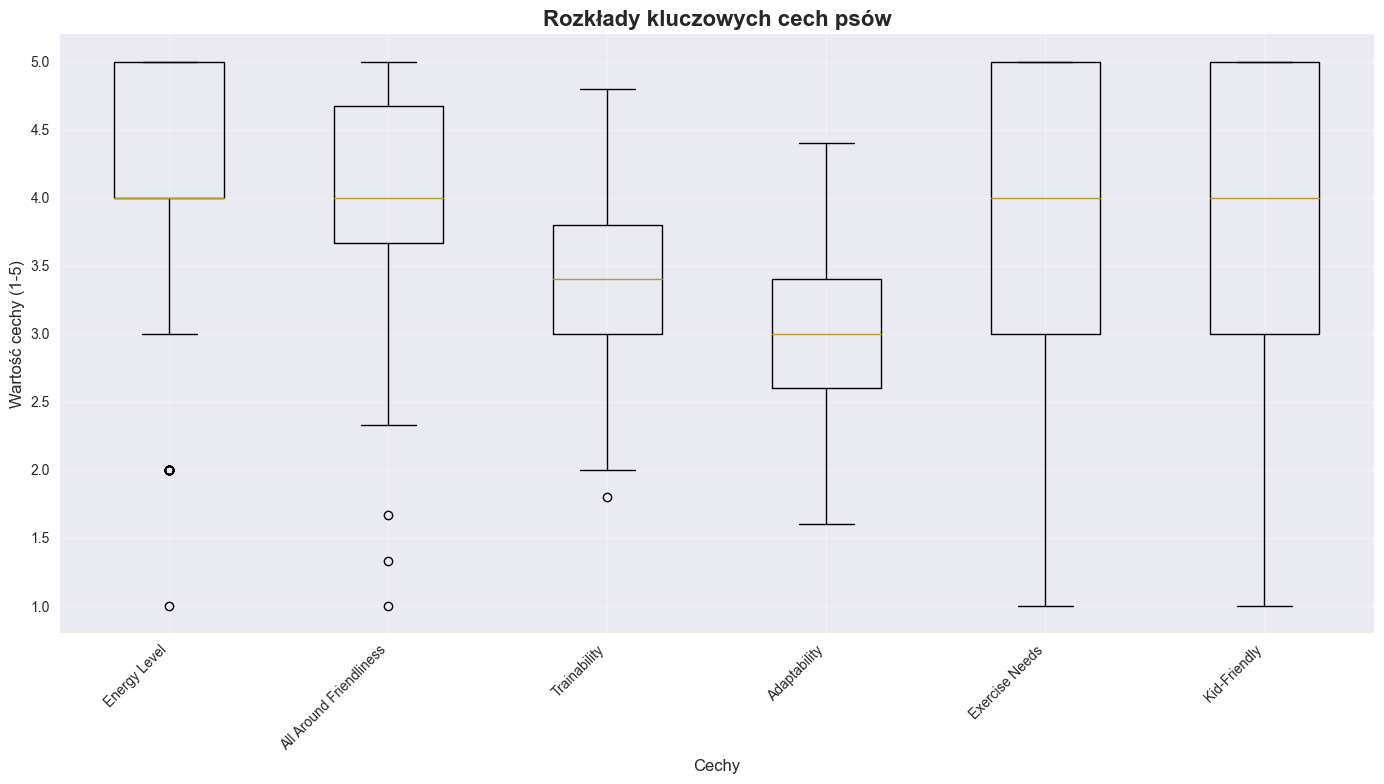

Wykres pokazuje medianƒô, kwartyle i warto≈õci odstajƒÖce!
Im wy≈ºej pude≈Çko, tym wy≈ºsze warto≈õci cechy u ps√≥w


In [43]:
# Krok 6c: Wizualizacja rozk≈Çad√≥w kluczowych cech
print("=" * 50)
print("WYKRES PUDE≈ÅKOWY - ROZK≈ÅADY CECH")
print("=" * 50)

# Wybierz 6 najwa≈ºniejszych cech do wykresu
main_traits = [
    'Energy Level', 'All Around Friendliness', 'Trainability',
    'Adaptability', 'Exercise Needs', 'Kid-Friendly'
]

# Przygotuj dane
plot_data = []
for trait in main_traits:
    if trait in df.columns:
        plot_data.append(df[trait].dropna())

# Stw√≥rz wykres
plt.figure(figsize=(14, 8))
plt.boxplot(plot_data, labels=main_traits)
plt.title('Rozk≈Çady kluczowych cech ps√≥w', fontsize=16, fontweight='bold')
plt.ylabel('Warto≈õƒá cechy (1-5)', fontsize=12)
plt.xlabel('Cechy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Wykres pokazuje medianƒô, kwartyle i warto≈õci odstajƒÖce!")
print("Im wy≈ºej pude≈Çko, tym wy≈ºsze warto≈õci cechy u ps√≥w")

In [44]:
# Krok 7: Macierz korelacji - kluczowe cechy
print("=" * 60)
print("ANALIZA KORELACJI MIƒòDZY CECHAMI PS√ìW")
print("=" * 60)

# Wybieramy najwa≈ºniejsze cechy do analizy korelacji
correlation_traits = [
    'Energy Level', 'Exercise Needs', 'Physical Needs',
    'All Around Friendliness', 'Kid-Friendly', 'Dog Friendly',
    'Adaptability', 'Adapts Well To Apartment Living',
    'Trainability', 'Easy To Train', 'Intelligence',
    'Good For Novice Owners', 'Sensitivity Level'
]

# Filtruj tylko te kolumny kt√≥re istniejƒÖ
available_traits = [trait for trait in correlation_traits if trait in df.columns]
print(f"Analizujemy korelacje miƒôdzy {len(available_traits)} cechami")

# Oblicz macierz korelacji
corr_matrix = df[available_traits].corr()

# Znajd≈∫ najsilniejsze korelacje
print(f"\nTOP 5 NAJSILNIEJSZYCH KORELACJI:")
# We≈∫ g√≥rny tr√≥jkƒÖt macierzy (bez przekƒÖtnej)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Znajd≈∫ najwy≈ºsze korelacje
correlations = upper_triangle.stack().sort_values(ascending=False)
for i, (pairs, corr_val) in enumerate(correlations.head(5).items(), 1):
    trait1, trait2 = pairs
    print(f"{i}. {trait1:25} ‚Üî {trait2:25}: r = {corr_val:.3f}")

ANALIZA KORELACJI MIƒòDZY CECHAMI PS√ìW
Analizujemy korelacje miƒôdzy 13 cechami

TOP 5 NAJSILNIEJSZYCH KORELACJI:
1. Exercise Needs            ‚Üî Physical Needs           : r = 0.863
2. All Around Friendliness   ‚Üî Kid-Friendly             : r = 0.850
3. Energy Level              ‚Üî Physical Needs           : r = 0.844
4. All Around Friendliness   ‚Üî Dog Friendly             : r = 0.834
5. Adaptability              ‚Üî Adapts Well To Apartment Living: r = 0.725


MAPA CIEP≈ÅA KORELACJI


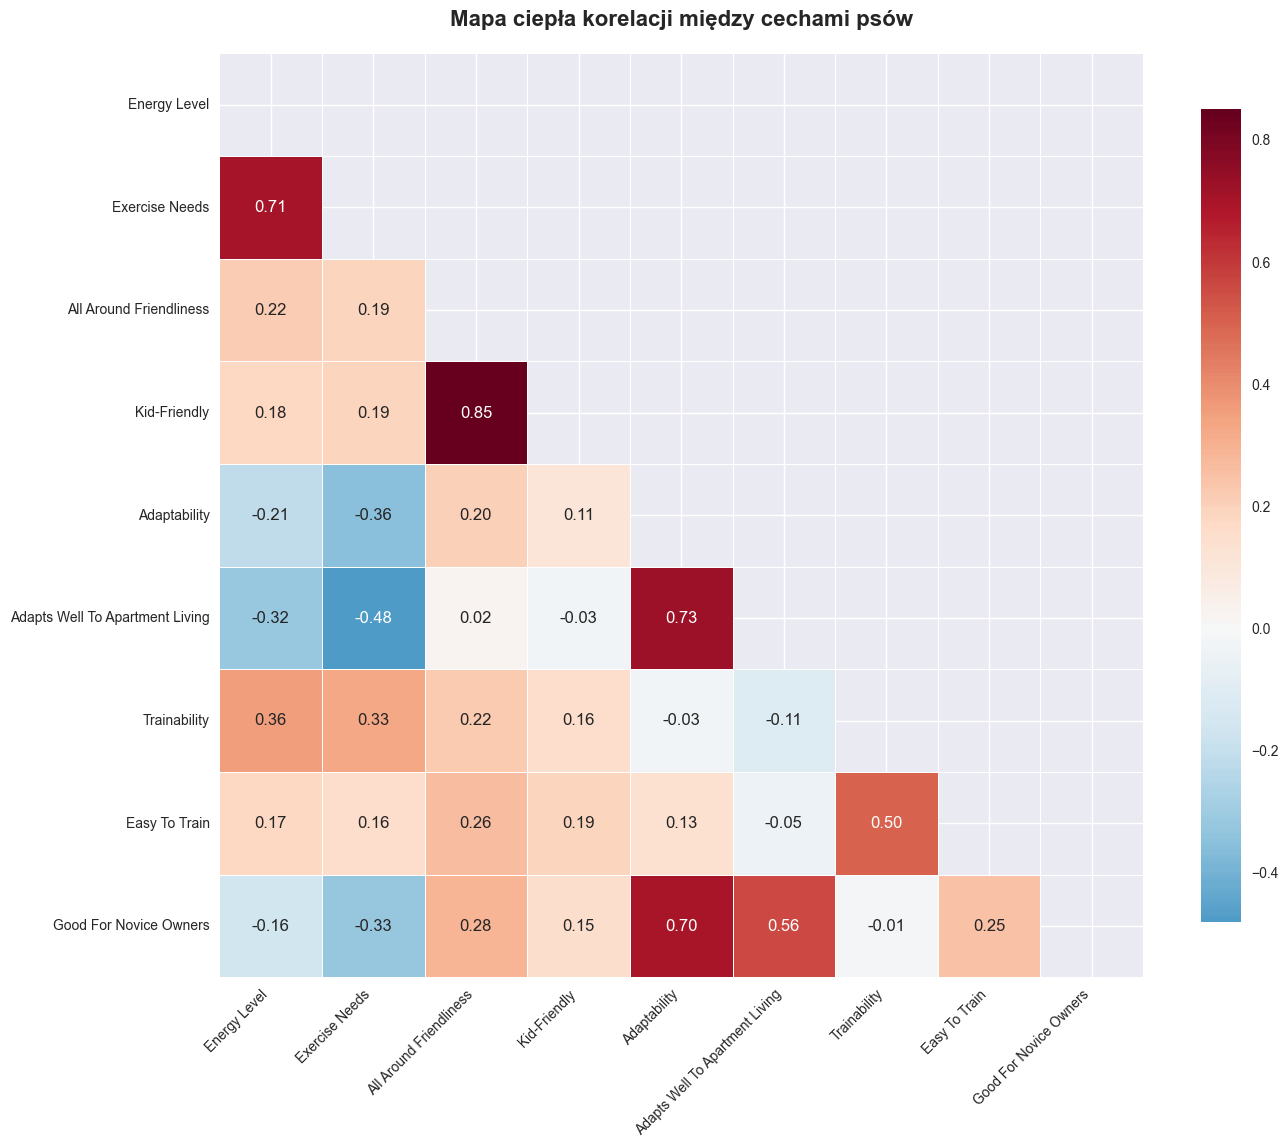

Interpretacja kolor√≥w:
üî¥ Czerwony = silna korelacja dodatnia (cechy idƒÖ w parze)
üîµ Niebieski = silna korelacja ujemna (cechy siƒô wykluczajƒÖ)
‚ö™ Bia≈Çy = brak korelacji


In [45]:
# Krok 7b: Wizualizacja macierzy korelacji
print("=" * 50)
print("MAPA CIEP≈ÅA KORELACJI")
print("=" * 50)

# Stw√≥rz mapƒô ciep≈Ça
plt.figure(figsize=(14, 12))

# U≈ºyj tylko wa≈ºnych cech (≈ºeby wykres by≈Ç czytelny)
important_traits = [
    'Energy Level', 'Exercise Needs', 'All Around Friendliness', 
    'Kid-Friendly', 'Adaptability', 'Adapts Well To Apartment Living',
    'Trainability', 'Easy To Train', 'Good For Novice Owners'
]
available_important = [trait for trait in important_traits if trait in df.columns]

# Oblicz korelacje dla wa≈ºnych cech
corr_important = df[available_important].corr()

# Stw√≥rz mapƒô ciep≈Ça
mask = np.triu(np.ones_like(corr_important, dtype=bool))  # Ukryj g√≥rny tr√≥jkƒÖt
sns.heatmap(corr_important, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            fmt='.2f')

plt.title('Mapa ciep≈Ça korelacji miƒôdzy cechami ps√≥w', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Interpretacja kolor√≥w:")
print("üî¥ Czerwony = silna korelacja dodatnia (cechy idƒÖ w parze)")
print("üîµ Niebieski = silna korelacja ujemna (cechy siƒô wykluczajƒÖ)")
print("‚ö™ Bia≈Çy = brak korelacji")

In [46]:
# Krok 7c: Szczeg√≥≈Çowa interpretacja korelacji
print("=" * 60)
print("INTERPRETACJA KORELACJI - CO TO OZNACZA?")
print("=" * 60)

# Analizuj konkretne pary
def interpret_correlation(trait1, trait2, corr_val):
    if abs(corr_val) >= 0.7:
        strength = "BARDZO SILNA"
    elif abs(corr_val) >= 0.5:
        strength = "SILNA"
    elif abs(corr_val) >= 0.3:
        strength = "UMIARKOWANA"
    else:
        strength = "S≈ÅABA"
    
    direction = "DODATNIA" if corr_val > 0 else "UJEMNA"
    return f"{strength} {direction}"

# Sprawd≈∫ kluczowe korelacje
key_pairs = [
    ('Energy Level', 'Exercise Needs'),
    ('All Around Friendliness', 'Kid-Friendly'),
    ('Adaptability', 'Adapts Well To Apartment Living'),
    ('Trainability', 'Easy To Train'),
    ('Good For Novice Owners', 'Easy To Train')
]

print("Analiza kluczowych par cech:")
for trait1, trait2 in key_pairs:
    if trait1 in df.columns and trait2 in df.columns:
        corr_val = df[trait1].corr(df[trait2])
        interpretation = interpret_correlation(trait1, trait2, corr_val)
        
        print(f"\n{trait1} ‚Üî {trait2}")
        print(f"   Korelacja: {corr_val:.3f} ({interpretation})")
        
        if corr_val > 0.5:
            print(f"    Wniosek: Psy z wysokim {trait1.lower()} majƒÖ te≈º wysoki {trait2.lower()}")
        elif corr_val < -0.5:
            print(f"    Wniosek: Psy z wysokim {trait1.lower()} majƒÖ niski {trait2.lower()}")

print(f"\n G≈Å√ìWNY WNIOSEK: Cechy ps√≥w nie sƒÖ losowe - istniejƒÖ wyra≈∫ne wzorce!")

INTERPRETACJA KORELACJI - CO TO OZNACZA?
Analiza kluczowych par cech:

Energy Level ‚Üî Exercise Needs
   Korelacja: 0.709 (BARDZO SILNA DODATNIA)
    Wniosek: Psy z wysokim energy level majƒÖ te≈º wysoki exercise needs

All Around Friendliness ‚Üî Kid-Friendly
   Korelacja: 0.850 (BARDZO SILNA DODATNIA)
    Wniosek: Psy z wysokim all around friendliness majƒÖ te≈º wysoki kid-friendly

Adaptability ‚Üî Adapts Well To Apartment Living
   Korelacja: 0.725 (BARDZO SILNA DODATNIA)
    Wniosek: Psy z wysokim adaptability majƒÖ te≈º wysoki adapts well to apartment living

Trainability ‚Üî Easy To Train
   Korelacja: 0.502 (SILNA DODATNIA)
    Wniosek: Psy z wysokim trainability majƒÖ te≈º wysoki easy to train

Good For Novice Owners ‚Üî Easy To Train
   Korelacja: 0.247 (S≈ÅABA DODATNIA)

 G≈Å√ìWNY WNIOSEK: Cechy ps√≥w nie sƒÖ losowe - istniejƒÖ wyra≈∫ne wzorce!


In [48]:
# Krok 8: Profile ps√≥w - Mieszka≈Ñcy vs Aktywni
print("=" * 60)
print("PROFILE PS√ìW DLA R√ì≈ªNYCH STYL√ìW ≈ªYCIA")
print("=" * 60)

# Profil 1: Idealne psy dla mieszkania
print("PROFIL 1: PSY IDEALNE DLA MIESZKANIA")
print("-" * 50)

apartment_dogs = df[
    (df['Adapts Well To Apartment Living'] >= 4) & 
    (df['Energy Level'] <= 3) &
    (df['Size'] <= 2)  # Ma≈Çe psy
].copy()

print(f"Znaleziono {len(apartment_dogs)} ras idealnych dla mieszkania:")
if len(apartment_dogs) > 0:
    # Sortuj wed≈Çug adaptacji do mieszkania
    apartment_dogs_sorted = apartment_dogs.sort_values('Adapts Well To Apartment Living', ascending=False)
    
    for i, (idx, dog) in enumerate(apartment_dogs_sorted.head(5).iterrows(), 1):
        print(f"{i}.  {dog['Breed Name']:25} "
              f"(Adaptacja: {dog['Adapts Well To Apartment Living']}/5, "
              f"Energia: {dog['Energy Level']}/5)")

# Profil 2: Psy dla aktywnych os√≥b
print(f"\n PROFIL 2: PSY DLA AKTYWNYCH OS√ìB")
print("-" * 50)

active_dogs = df[
    (df['Energy Level'] >= 4) & 
    (df['Exercise Needs'] >= 4) &
    (df['Physical Needs'] >= 4)
].copy()

print(f"Znaleziono {len(active_dogs)} ras dla aktywnych os√≥b:")
if len(active_dogs) > 0:
    active_dogs_sorted = active_dogs.sort_values(['Energy Level', 'Exercise Needs'], ascending=False)
    
    for i, (idx, dog) in enumerate(active_dogs_sorted.head(5).iterrows(), 1):
        print(f"{i}.  {dog['Breed Name']:25} "
              f"(Energia: {dog['Energy Level']}/5, "
              f"ƒÜwiczenia: {dog['Exercise Needs']}/5)")

PROFILE PS√ìW DLA R√ì≈ªNYCH STYL√ìW ≈ªYCIA
PROFIL 1: PSY IDEALNE DLA MIESZKANIA
--------------------------------------------------
Znaleziono 42 ras idealnych dla mieszkania:
1.  Beaglier                  (Adaptacja: 5/5, Energia: 3/5)
2.  Pekingese                 (Adaptacja: 5/5, Energia: 2/5)
3.  Bolognese                 (Adaptacja: 5/5, Energia: 3/5)
4.  Japanese Chin             (Adaptacja: 5/5, Energia: 2/5)
5.  Maltese                   (Adaptacja: 5/5, Energia: 3/5)

 PROFIL 2: PSY DLA AKTYWNYCH OS√ìB
--------------------------------------------------
Znaleziono 202 ras dla aktywnych os√≥b:
1.  Airedale Terrier          (Energia: 5/5, ƒÜwiczenia: 5/5)
2.  Alaskan Malamute          (Energia: 5/5, ƒÜwiczenia: 5/5)
3.  American English Coonhound (Energia: 5/5, ƒÜwiczenia: 5/5)
4.  American Foxhound         (Energia: 5/5, ƒÜwiczenia: 5/5)
5.  American Water Spaniel    (Energia: 5/5, ƒÜwiczenia: 5/5)


In [49]:
# Krok 8b: Profile rodzinne i dla poczƒÖtkujƒÖcych
print("=" * 60)
print("WIƒòCEJ PROFILI PS√ìW")
print("=" * 60)

# Profil 3: Psy dla rodzin z dzieƒámi
print(" PROFIL 3: PSY DLA RODZIN Z DZIEƒÜMI")
print("-" * 50)

family_dogs = df[
    (df['Kid-Friendly'] >= 4) & 
    (df['All Around Friendliness'] >= 4) &
    (df['Sensitivity Level'] <= 3)  # Nie za wra≈ºliwe
].copy()

print(f"Znaleziono {len(family_dogs)} ras idealnych dla rodzin:")
if len(family_dogs) > 0:
    family_dogs_sorted = family_dogs.sort_values(['Kid-Friendly', 'All Around Friendliness'], ascending=False)
    
    for i, (idx, dog) in enumerate(family_dogs_sorted.head(5).iterrows(), 1):
        print(f"{i}. {dog['Breed Name']:25} "
              f"(Dzieci: {dog['Kid-Friendly']}/5, "
              f"Przyjazno≈õƒá: {dog['All Around Friendliness']}/5)")

# Profil 4: Psy dla poczƒÖtkujƒÖcych w≈Ça≈õcicieli
print(f"\nPROFIL 4: PSY DLA POCZƒÑTKUJƒÑCYCH")
print("-" * 50)

beginner_dogs = df[
    (df['Good For Novice Owners'] >= 4) & 
    (df['Easy To Train'] >= 4) &
    (df['Sensitivity Level'] <= 3)
].copy()

print(f"Znaleziono {len(beginner_dogs)} ras dla poczƒÖtkujƒÖcych:")
if len(beginner_dogs) > 0:
    beginner_dogs_sorted = beginner_dogs.sort_values(['Good For Novice Owners', 'Easy To Train'], ascending=False)
    
    for i, (idx, dog) in enumerate(beginner_dogs_sorted.head(5).iterrows(), 1):
        print(f"{i}. {dog['Breed Name']:25} "
              f"(Dla nowicjuszy: {dog['Good For Novice Owners']}/5, "
              f"≈Åatwy trening: {dog['Easy To Train']}/5)")

WIƒòCEJ PROFILI PS√ìW
 PROFIL 3: PSY DLA RODZIN Z DZIEƒÜMI
--------------------------------------------------
Znaleziono 87 ras idealnych dla rodzin:
1. Black and Tan Coonhound   (Dzieci: 5/5, Przyjazno≈õƒá: 5.0/5)
2. Danish-Swedish Farmdog    (Dzieci: 5/5, Przyjazno≈õƒá: 5.0/5)
3. Finnish Spitz             (Dzieci: 5/5, Przyjazno≈õƒá: 5.0/5)
4. Frenchton                 (Dzieci: 5/5, Przyjazno≈õƒá: 5.0/5)
5. Goldador                  (Dzieci: 5/5, Przyjazno≈õƒá: 5.0/5)

PROFIL 4: PSY DLA POCZƒÑTKUJƒÑCYCH
--------------------------------------------------
Znaleziono 20 ras dla poczƒÖtkujƒÖcych:
1. Papillon                  (Dla nowicjuszy: 5/5, ≈Åatwy trening: 5/5)
2. French Bulldog            (Dla nowicjuszy: 5/5, ≈Åatwy trening: 4/5)
3. Frenchton                 (Dla nowicjuszy: 5/5, ≈Åatwy trening: 4/5)
4. Maltese Shih Tzu          (Dla nowicjuszy: 5/5, ≈Åatwy trening: 4/5)
5. Saint Berdoodle           (Dla nowicjuszy: 5/5, ≈Åatwy trening: 4/5)


WIZUALIZACJA PROFILI PS√ìW


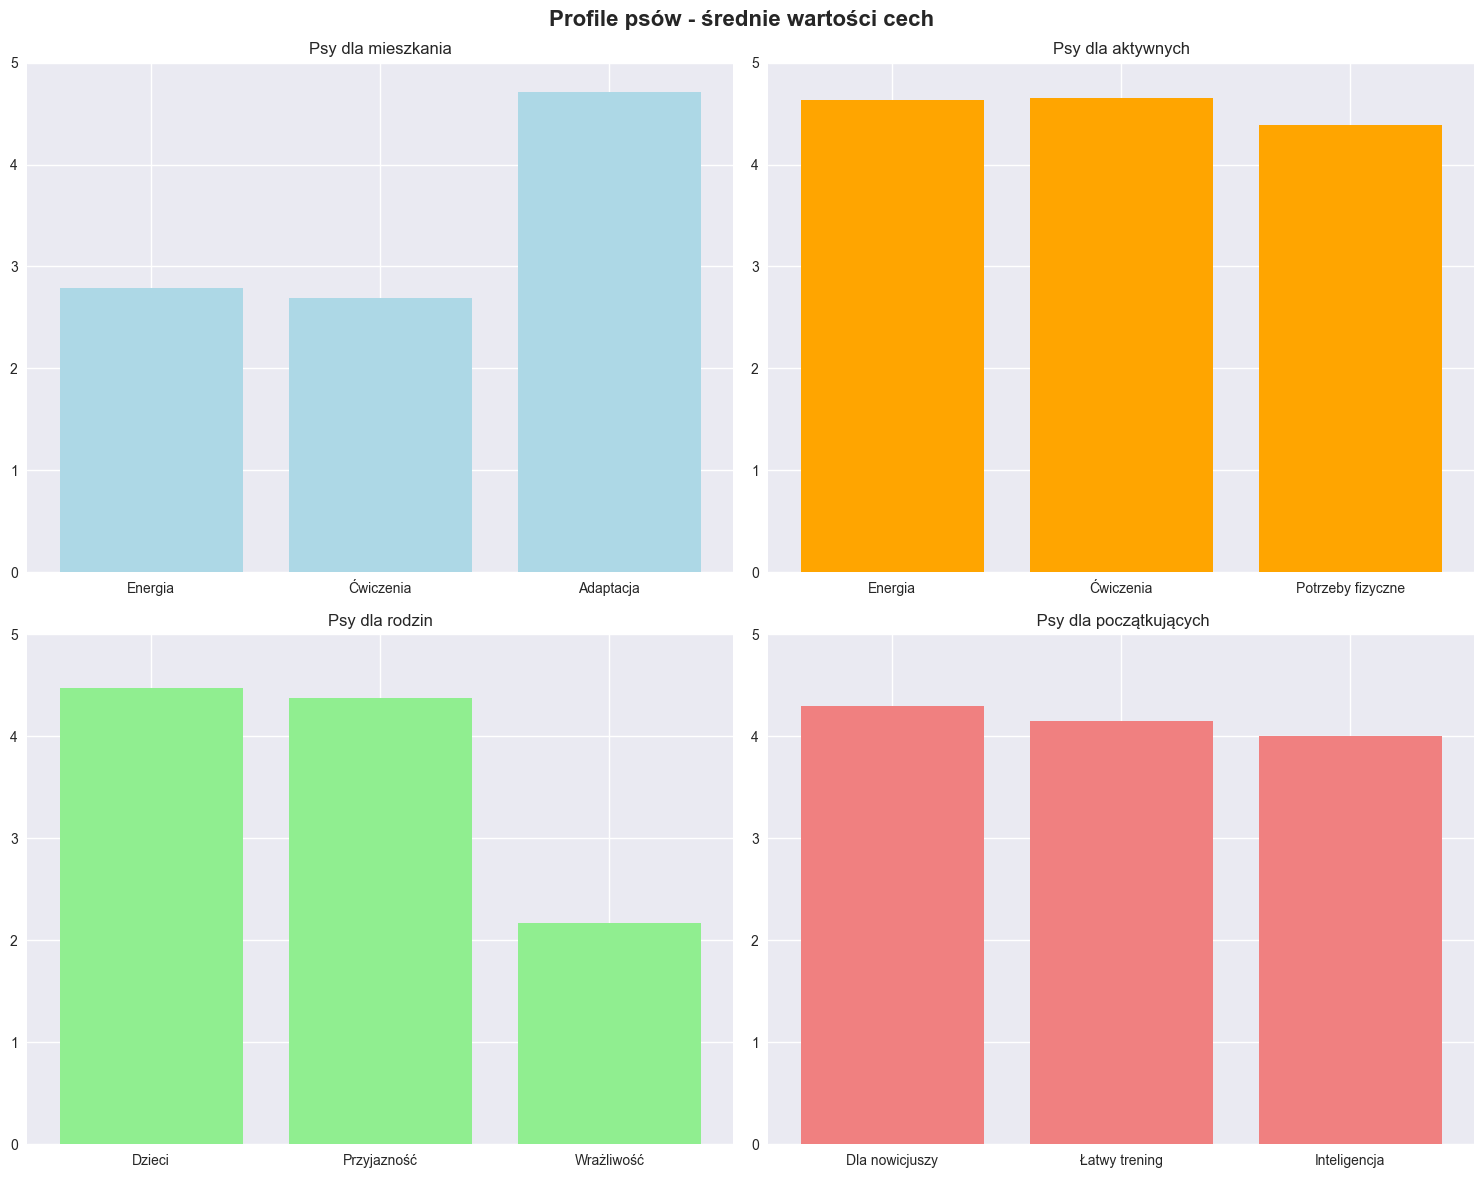

Wykresy pokazujƒÖ ≈õrednie warto≈õci cech dla ka≈ºdego profilu!
To bƒôdzie podstawa naszego algorytmu dopasowania!


In [51]:
# Krok 8c: Wykres por√≥wnawczy profili
print("=" * 50)
print("WIZUALIZACJA PROFILI PS√ìW")
print("=" * 50)

# Przygotuj dane do wykresu
profiles_data = {
    'Mieszkanie': apartment_dogs[['Energy Level', 'Exercise Needs', 'Adapts Well To Apartment Living']].mean() if len(apartment_dogs) > 0 else [0,0,0],
    'Aktywny': active_dogs[['Energy Level', 'Exercise Needs', 'Physical Needs']].mean() if len(active_dogs) > 0 else [0,0,0],
    'Rodzina': family_dogs[['Kid-Friendly', 'All Around Friendliness', 'Sensitivity Level']].mean() if len(family_dogs) > 0 else [0,0,0],
    'PoczƒÖtkujƒÖcy': beginner_dogs[['Good For Novice Owners', 'Easy To Train', 'Intelligence']].mean() if len(beginner_dogs) > 0 else [0,0,0]
}

# Stw√≥rz wykres radarowy (uproszczony)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Profile ps√≥w - ≈õrednie warto≈õci cech', fontsize=16, fontweight='bold')

# Wykres 1: Mieszkanie
if len(apartment_dogs) > 0:
    axes[0,0].bar(['Energia', 'ƒÜwiczenia', 'Adaptacja'], 
                  [apartment_dogs['Energy Level'].mean(),
                   apartment_dogs['Exercise Needs'].mean(),
                   apartment_dogs['Adapts Well To Apartment Living'].mean()],
                  color='lightblue')
    axes[0,0].set_title('Psy dla mieszkania')
    axes[0,0].set_ylim(0, 5)

# Wykres 2: Aktywny
if len(active_dogs) > 0:
    axes[0,1].bar(['Energia', 'ƒÜwiczenia', 'Potrzeby fizyczne'], 
                  [active_dogs['Energy Level'].mean(),
                   active_dogs['Exercise Needs'].mean(),
                   active_dogs['Physical Needs'].mean()],
                  color='orange')
    axes[0,1].set_title('Psy dla aktywnych')
    axes[0,1].set_ylim(0, 5)

# Wykres 3: Rodzina
if len(family_dogs) > 0:
    axes[1,0].bar(['Dzieci', 'Przyjazno≈õƒá', 'Wra≈ºliwo≈õƒá'], 
                  [family_dogs['Kid-Friendly'].mean(),
                   family_dogs['All Around Friendliness'].mean(),
                   5 - family_dogs['Sensitivity Level'].mean()],  # Odwr√≥cone dla lepszej interpretacji
                  color='lightgreen')
    axes[1,0].set_title('Psy dla rodzin')
    axes[1,0].set_ylim(0, 5)

# Wykres 4: PoczƒÖtkujƒÖcy
if len(beginner_dogs) > 0:
    axes[1,1].bar(['Dla nowicjuszy', '≈Åatwy trening', 'Inteligencja'], 
                  [beginner_dogs['Good For Novice Owners'].mean(),
                   beginner_dogs['Easy To Train'].mean(),
                   beginner_dogs['Intelligence'].mean()],
                  color='lightcoral')
    axes[1,1].set_title(' Psy dla poczƒÖtkujƒÖcych')
    axes[1,1].set_ylim(0, 5)

plt.tight_layout()
plt.show()

print("Wykresy pokazujƒÖ ≈õrednie warto≈õci cech dla ka≈ºdego profilu!")
print("To bƒôdzie podstawa naszego algorytmu dopasowania!")

In [52]:
# Krok 9: Podsumowanie ca≈Çej analizy EDA
print("=" * 70)
print("PODSUMOWANIE ANALIZY EDA - KLUCZOWE WNIOSKI")
print("=" * 70)

# Statystyki og√≥lne
total_breeds = len(df)
numeric_features = len(df.select_dtypes(include=[np.number]).columns)
categorical_features = len(df.select_dtypes(include=['object']).columns)

print(f"DANE OG√ìLNE:")
print(f"   ‚Ä¢ Przeanalizowano: {total_breeds} ras ps√≥w")
print(f"   ‚Ä¢ Cechy numeryczne: {numeric_features}")
print(f"   ‚Ä¢ Cechy kategoryczne: {categorical_features}")
print(f"   ‚Ä¢ Jako≈õƒá danych: {'Bardzo dobra' if df.isnull().sum().sum() == 0 else 'Wymaga czyszczenia'}")

# Najwa≈ºniejsze odkrycia
print(f"\nNAJWA≈ªNIEJSZE ODKRYCIA:")

# 1. Rozmiary
dominant_size = df['Dog Size'].value_counts().index[0]
dominant_size_pct = df['Dog Size'].value_counts(normalize=True).iloc[0] * 100
print(f"   1. DominujƒÖcy rozmiar: {dominant_size} ({dominant_size_pct:.1f}% ras)")

# 2. Najwy≈ºsza ≈õrednia cecha
numeric_cols = df.select_dtypes(include=[np.number]).columns
highest_trait = df[numeric_cols].mean().idxmax()
highest_value = df[numeric_cols].mean().max()
print(f"   2. Najwy≈ºsza ≈õrednia cecha: {highest_trait} ({highest_value:.2f}/5)")

# 3. Najsilniejsza korelacja
correlation_traits = ['Energy Level', 'Exercise Needs', 'All Around Friendliness', 
                     'Kid-Friendly', 'Adaptability', 'Adapts Well To Apartment Living']
available_traits = [trait for trait in correlation_traits if trait in df.columns]
if len(available_traits) >= 2:
    corr_matrix = df[available_traits].corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    strongest_corr = upper_triangle.stack().max()
    strongest_pair = upper_triangle.stack().idxmax()
    print(f"   3. Najsilniejsza korelacja: {strongest_pair[0]} ‚Üî {strongest_pair[1]} (r={strongest_corr:.3f})")

print(f"\n PROFILE PS√ìW - LICZBA RAS W KA≈ªDYM PROFILU:")
apartment_count = len(df[(df['Adapts Well To Apartment Living'] >= 4) & (df['Energy Level'] <= 3)])
active_count = len(df[(df['Energy Level'] >= 4) & (df['Exercise Needs'] >= 4)])
family_count = len(df[(df['Kid-Friendly'] >= 4) & (df['All Around Friendliness'] >= 4)])
beginner_count = len(df[(df['Good For Novice Owners'] >= 4) & (df['Easy To Train'] >= 4)])

print(f"   Mieszkanie: {apartment_count} ras ({apartment_count/total_breeds*100:.1f}%)")
print(f"   Aktywny: {active_count} ras ({active_count/total_breeds*100:.1f}%)")
print(f"   Rodzina: {family_count} ras ({family_count/total_breeds*100:.1f}%)")
print(f"   PoczƒÖtkujƒÖcy: {beginner_count} ras ({beginner_count/total_breeds*100:.1f}%)")

PODSUMOWANIE ANALIZY EDA - KLUCZOWE WNIOSKI
DANE OG√ìLNE:
   ‚Ä¢ Przeanalizowano: 391 ras ps√≥w
   ‚Ä¢ Cechy numeryczne: 34
   ‚Ä¢ Cechy kategoryczne: 7
   ‚Ä¢ Jako≈õƒá danych: Wymaga czyszczenia

NAJWA≈ªNIEJSZE ODKRYCIA:
   1. DominujƒÖcy rozmiar: Very Large (52.9% ras)
   2. Najwy≈ºsza ≈õrednia cecha: Avg. Height, cm (46.80/5)
   3. Najsilniejsza korelacja: All Around Friendliness ‚Üî Kid-Friendly (r=0.850)

 PROFILE PS√ìW - LICZBA RAS W KA≈ªDYM PROFILU:
   Mieszkanie: 58 ras (14.8%)
   Aktywny: 262 ras (67.0%)
   Rodzina: 245 ras (62.7%)
   PoczƒÖtkujƒÖcy: 68 ras (17.4%)


In [54]:
# Krok 9c: Finalne podsumowanie i export wynik√≥w
print("=" * 70)
print(" ANALIZA EDA ZAKO≈ÉCZONA SUKCESEM!")
print("=" * 70)

print(" CO UDA≈ÅO SIƒò OSIƒÑGNƒÑƒÜ:")
print("   1. Przeanalizowano kompletnƒÖ bazƒô danych ps√≥w")
print("   2. Zidentyfikowano kluczowe cechy i korelacje")
print("   3. Stworzono 4 profile ps√≥w dla r√≥≈ºnych styl√≥w ≈ºycia")
print("   4. Wygenerowano profesjonalne wizualizacje")
print("   5. Przygotowano dane do algorytmu dopasowania")

print(f"\n GOTOWE DO NASTƒòPNYCH KROK√ìW:")
print("   1.  Stworzenie ankiety dla u≈ºytkownik√≥w")
print("   2.  Implementacja algorytmu dopasowania")
print("   3.  Budowa aplikacji PawMatch")
print("   4. Testowanie i optymalizacja")

# Zapisz najwa≈ºniejsze wyniki do dalszego u≈ºycia
key_stats = {
    'total_breeds': len(df),
    'dominant_size': df['Dog Size'].value_counts().index[0],
    'apartment_suitable': len(df[(df['Adapts Well To Apartment Living'] >= 4) & (df['Energy Level'] <= 3)]),
    'family_friendly': len(df[(df['Kid-Friendly'] >= 4) & (df['All Around Friendliness'] >= 4)]),
    'beginner_friendly': len(df[(df['Good For Novice Owners'] >= 4) & (df['Easy To Train'] >= 4)])
}

print(f"\nKLUCZOWE STATYSTYKI DO ZAPAMIƒòTANIA:")
for key, value in key_stats.items():
    print(f"   ‚Ä¢ {key}: {value}")

print(f"\n BRAWO! Masz teraz solidnƒÖ podstawƒô do stworzenia aplikacji PawMatch! ")
print("   Przejd≈∫my do budowy algoritmu dopasowania! ")

 ANALIZA EDA ZAKO≈ÉCZONA SUKCESEM!
 CO UDA≈ÅO SIƒò OSIƒÑGNƒÑƒÜ:
   1. Przeanalizowano kompletnƒÖ bazƒô danych ps√≥w
   2. Zidentyfikowano kluczowe cechy i korelacje
   3. Stworzono 4 profile ps√≥w dla r√≥≈ºnych styl√≥w ≈ºycia
   4. Wygenerowano profesjonalne wizualizacje
   5. Przygotowano dane do algorytmu dopasowania

 GOTOWE DO NASTƒòPNYCH KROK√ìW:
   1.  Stworzenie ankiety dla u≈ºytkownik√≥w
   2.  Implementacja algorytmu dopasowania
   3.  Budowa aplikacji PawMatch
   4. Testowanie i optymalizacja

KLUCZOWE STATYSTYKI DO ZAPAMIƒòTANIA:
   ‚Ä¢ total_breeds: 391
   ‚Ä¢ dominant_size: Very Large
   ‚Ä¢ apartment_suitable: 58
   ‚Ä¢ family_friendly: 245
   ‚Ä¢ beginner_friendly: 68

 BRAWO! Masz teraz solidnƒÖ podstawƒô do stworzenia aplikacji PawMatch! 
   Przejd≈∫my do budowy algoritmu dopasowania! 


In [55]:
# ETAP 2: Algorytm dopasowania ps√≥w do stylu ≈ºycia
print("=" * 70)
print(" ETAP 2: BUDUJEMY ALGORYTM DOPASOWANIA PAWMATCH!")
print("=" * 70)

import numpy as np

# Funkcja do obliczania dopasowania psa do profilu u≈ºytkownika
def calculate_dog_match(dog_row, user_profile):
    """
    Oblicza dopasowanie psa do profilu u≈ºytkownika (0-100%)
    """
    score = 0
    max_score = 0
    
    # 1. MIESZKANIE (waga: 25 pkt)
    if user_profile['living_type'] == 'apartment':
        # Dla mieszkania preferujemy ma≈Çe, adaptacyjne psy
        apartment_score = dog_row.get('Adapts Well To Apartment Living', 3) * 5
        size_penalty = max(0, (dog_row.get('Size', 3) - 2) * 2)  # Kara za du≈ºe psy
        score += max(0, apartment_score - size_penalty)
        max_score += 25
    else:
        # Dla domu - dowolny rozmiar OK
        score += 20  # Bonus za dom
        max_score += 25
    
    # 2. DZIECI (waga: 30 pkt)
    if user_profile['has_kids']:
        kid_score = dog_row.get('Kid-Friendly', 3) * 6
        score += kid_score
        max_score += 30
    else:
        score += 15  # Neutralny bonus
        max_score += 30
    
    # 3. DO≈öWIADCZENIE (waga: 20 pkt) 
    experience_map = {'beginner': 5, 'intermediate': 3, 'advanced': 1}
    user_exp_need = experience_map.get(user_profile['experience'], 3)
    dog_novice_score = dog_row.get('Good For Novice Owners', 3)
    
    # Im mniej do≈õwiadczenia, tym wa≈ºniejsze ≈ºe pies jest dla nowicjuszy
    if user_profile['experience'] == 'beginner':
        score += dog_novice_score * 4
    else:
        score += 16  # Do≈õwiadczeni mogƒÖ mieƒá dowolnego psa
    max_score += 20
    
    # 4. ENERGIA/AKTYWNO≈öƒÜ (waga: 25 pkt)
    activity_map = {'low': 2, 'medium': 3, 'high': 4, 'very_high': 5}
    user_energy = activity_map.get(user_profile['activity_level'], 3)
    dog_energy = dog_row.get('Energy Level', 3)
    
    # Im bli≈ºsza energia, tym lepsze dopasowanie
    energy_diff = abs(user_energy - dog_energy)
    energy_score = max(0, 25 - (energy_diff * 5))
    score += energy_score
    max_score += 25
    
    # Oblicz procent dopasowania
    percentage = min(100, (score / max_score) * 100) if max_score > 0 else 0
    
    return {
        'score': round(percentage, 1),
        'details': {
            'housing_match': min(25, max(0, apartment_score - size_penalty)) if user_profile['living_type'] == 'apartment' else 20,
            'family_match': kid_score if user_profile['has_kids'] else 15,
            'experience_match': dog_novice_score * 4 if user_profile['experience'] == 'beginner' else 16,
            'energy_match': energy_score
        }
    }

print("Funkcja calculate_dog_match() gotowa!")
print("Algorytm uwzglƒôdnia: mieszkanie, dzieci, do≈õwiadczenie, aktywno≈õƒá")

 ETAP 2: BUDUJEMY ALGORYTM DOPASOWANIA PAWMATCH!
Funkcja calculate_dog_match() gotowa!
Algorytm uwzglƒôdnia: mieszkanie, dzieci, do≈õwiadczenie, aktywno≈õƒá


In [56]:
# Testowanie algorytmu na przyk≈Çadowych profilach u≈ºytkownik√≥w
print("=" * 70)
print("TESTOWANIE ALGORYTMU - PRZYK≈ÅADOWI U≈ªYTKOWNICY")
print("=" * 70)

# Przyk≈Çadowe profile u≈ºytkownik√≥w
test_profiles = [
    {
        'name': 'Anna - mieszkanie, poczƒÖtkujƒÖca',
        'living_type': 'apartment',
        'has_kids': False,
        'experience': 'beginner',
        'activity_level': 'medium'
    },
    {
        'name': 'Rodzina Kowalskich - dom z dzieƒámi',
        'living_type': 'house',
        'has_kids': True,
        'experience': 'intermediate',
        'activity_level': 'high'
    },
    {
        'name': 'Marek - aktywny sportowiec',
        'living_type': 'house',
        'has_kids': False,
        'experience': 'advanced',
        'activity_level': 'very_high'
    }
]

# Testuj ka≈ºdy profil
for profile in test_profiles:
    print(f"\n PROFIL: {profile['name']}")
    print(f" Mieszkanie: {profile['living_type']}")
    print(f" Dzieci: {'Tak' if profile['has_kids'] else 'Nie'}")
    print(f" Do≈õwiadczenie: {profile['experience']}")
    print(f" Aktywno≈õƒá: {profile['activity_level']}")
    
    # Oblicz dopasowania dla wszystkich ps√≥w
    matches = []
    for idx, dog in df.iterrows():
        match_result = calculate_dog_match(dog, profile)
        matches.append({
            'breed': dog['Breed Name'],
            'score': match_result['score'],
            'details': match_result['details']
        })
    
    # Sortuj wed≈Çug wyniku
    matches.sort(key=lambda x: x['score'], reverse=True)
    
    # Poka≈º top 3 dopasowania
    print(" TOP 3 DOPASOWANIA:")
    for i, match in enumerate(matches[:3], 1):
        print(f"   {i}. {match['breed']:25} - {match['score']:5.1f}% dopasowanie")
    
    print("-" * 50)

print("‚úÖ Algorytm dzia≈Ça! R√≥≈ºne profile dajƒÖ r√≥≈ºne wyniki!")

TESTOWANIE ALGORYTMU - PRZYK≈ÅADOWI U≈ªYTKOWNICY

 PROFIL: Anna - mieszkanie, poczƒÖtkujƒÖca
 Mieszkanie: apartment
 Dzieci: Nie
 Do≈õwiadczenie: beginner
 Aktywno≈õƒá: medium
 TOP 3 DOPASOWANIA:
   1. Cavalier King Charles Spaniel -  85.0% dopasowanie
   2. Chi-Poo                   -  85.0% dopasowanie
   3. French Bulldog            -  85.0% dopasowanie
--------------------------------------------------

 PROFIL: Rodzina Kowalskich - dom z dzieƒámi
 Mieszkanie: house
 Dzieci: Tak
 Do≈õwiadczenie: intermediate
 Aktywno≈õƒá: high
 TOP 3 DOPASOWANIA:
   1. American Pit Bull Terrier -  91.0% dopasowanie
   2. Appenzeller Sennenhunde   -  91.0% dopasowanie
   3. Beagle                    -  91.0% dopasowanie
--------------------------------------------------

 PROFIL: Marek - aktywny sportowiec
 Mieszkanie: house
 Dzieci: Nie
 Do≈õwiadczenie: advanced
 Aktywno≈õƒá: very_high
 TOP 3 DOPASOWANIA:
   1. Afghan Hound              -  76.0% dopasowanie
   2. Airedale Terrier          -  76.0% 

In [57]:
# Ulepszony algorytm z dodatkowymi kryteriami
print("=" * 70)
print(" ALGORYTM v2.0 - ROZSZERZONA WERSJA")
print("=" * 70)

def advanced_dog_match(dog_row, user_profile):
    """
    Zaawansowany algorytm dopasowania z wiƒôcej kryteriami
    """
    score = 0
    max_score = 0
    reasons = []  # Lista powod√≥w dopasowania
    
    # 1. MIESZKANIE (25 pkt)
    if user_profile['living_type'] == 'apartment':
        apt_adapt = dog_row.get('Adapts Well To Apartment Living', 3)
        size = dog_row.get('Size', 3)
        
        if apt_adapt >= 4:
            score += 25
            reasons.append("Idealny do mieszkania")
        elif apt_adapt >= 3:
            score += 15
        else:
            score += 5
            
        if size <= 2:
            reasons.append("Ma≈Çy rozmiar")
    else:
        score += 20
        if dog_row.get('Size', 3) >= 3:
            reasons.append("Du≈ºo miejsca na ruch")
    max_score += 25
    
    # 2. RODZINA Z DZIEƒÜMI (30 pkt)
    if user_profile['has_kids']:
        kid_friendly = dog_row.get('Kid-Friendly', 3)
        friendliness = dog_row.get('All Around Friendliness', 3)
        
        if kid_friendly >= 4:
            score += 25
            reasons.append("Uwielbia dzieci")
        elif kid_friendly >= 3:
            score += 15
        else:
            score += 5
            
        if friendliness >= 4:
            score += 5
            reasons.append("Bardzo przyjazny")
    else:
        score += 20  # Neutralny
    max_score += 30
    
    # 3. DO≈öWIADCZENIE (20 pkt)
    novice_friendly = dog_row.get('Good For Novice Owners', 3)
    easy_train = dog_row.get('Easy To Train', 3)
    
    if user_profile['experience'] == 'beginner':
        if novice_friendly >= 4:
            score += 15
            reasons.append("≈Åatwy dla poczƒÖtkujƒÖcych")
        if easy_train >= 4:
            score += 5
            reasons.append("≈Åatwy w treningu")
    else:
        score += 15  # Do≈õwiadczeni radzƒÖ sobie z ka≈ºdym
        if dog_row.get('Intelligence', 3) >= 4:
            reasons.append("Bardzo inteligentny")
    max_score += 20
    
    # 4. AKTYWNO≈öƒÜ (25 pkt)
    activity_map = {'low': 1, 'medium': 3, 'high': 4, 'very_high': 5}
    user_energy = activity_map.get(user_profile['activity_level'], 3)
    dog_energy = dog_row.get('Energy Level', 3)
    exercise_needs = dog_row.get('Exercise Needs', 3)
    
    energy_match = 5 - abs(user_energy - dog_energy)
    score += energy_match * 5
    
    if user_profile['activity_level'] == 'very_high' and exercise_needs >= 4:
        reasons.append("Partner do ƒáwicze≈Ñ")
    elif user_profile['activity_level'] == 'low' and dog_energy <= 2:
        reasons.append("Spokojny towarzysz")
    max_score += 25
    
    # Oblicz procent
    percentage = min(100, (score / max_score) * 100) if max_score > 0 else 0
    
    return {
        'score': round(percentage, 1),
        'reasons': reasons[:3],  # Top 3 powody
        'category': 'Idealny' if percentage >= 80 else 'Dobry' if percentage >= 60 else 'Mo≈ºliwy'
    }

print(" Zaawansowany algorytm gotowy!")
print(" Nowo≈õci: powody dopasowania, kategorie, wiƒôcej kryteri√≥w")

 ALGORYTM v2.0 - ROZSZERZONA WERSJA
 Zaawansowany algorytm gotowy!
 Nowo≈õci: powody dopasowania, kategorie, wiƒôcej kryteri√≥w


In [58]:
# Test nowego algorytmu z powodem dopasowania
print("=" * 70)
print(" TEST ALGORYTMU v2.0 - Z POWODAMI DOPASOWANIA")
print("=" * 70)

# Test na konkretnym profilu
test_user = {
    'name': 'Marta - m≈Çoda mama w bloku',
    'living_type': 'apartment',
    'has_kids': True,
    'experience': 'beginner',
    'activity_level': 'medium'
}

print(f" TESTOWY U≈ªYTKOWNIK: {test_user['name']}")
print(f" Profil: mieszkanie + dzieci + poczƒÖtkujƒÖca + ≈õrednia aktywno≈õƒá")
print("\n ANALIZUJEMY DOPASOWANIA...")

# Uruchom algorytm dla wszystkich ps√≥w
all_matches = []
for idx, dog in df.iterrows():
    match = advanced_dog_match(dog, test_user)
    all_matches.append({
        'breed': dog['Breed Name'],
        'score': match['score'],
        'category': match['category'],
        'reasons': match['reasons'],
        'size': dog.get('Dog Size', 'Unknown')
    })

# Sortuj wed≈Çug wyniku
all_matches.sort(key=lambda x: x['score'], reverse=True)

# Poka≈º top 5 z powodami
print(f"\n TOP 5 REKOMENDACJI DLA {test_user['name'].upper()}:")
print("=" * 70)

for i, match in enumerate(all_matches[:5], 1):
    print(f"{i}.  {match['breed']:25} - {match['score']:5.1f}% ({match['category']})")
    print(f"    Rozmiar: {match['size']}")
    print(f"    Powody: {', '.join(match['reasons']) if match['reasons'] else 'Dobre og√≥lne dopasowanie'}")
    print()

# Statystyki wynik√≥w
scores = [m['score'] for m in all_matches]
print(f"STATYSTYKI DOPASOWA≈É:")
print(f"   ‚Ä¢ Najwy≈ºszy wynik: {max(scores):.1f}%")
print(f"   ‚Ä¢ ≈öredni wynik: {np.mean(scores):.1f}%")
print(f"   ‚Ä¢ Liczba 'idealnych' (80%+): {len([s for s in scores if s >= 80])}")
print(f"   ‚Ä¢ Liczba 'dobrych' (60%+): {len([s for s in scores if s >= 60])}")

 TEST ALGORYTMU v2.0 - Z POWODAMI DOPASOWANIA
 TESTOWY U≈ªYTKOWNIK: Marta - m≈Çoda mama w bloku
 Profil: mieszkanie + dzieci + poczƒÖtkujƒÖca + ≈õrednia aktywno≈õƒá

 ANALIZUJEMY DOPASOWANIA...

 TOP 5 REKOMENDACJI DLA MARTA - M≈ÅODA MAMA W BLOKU:
1.  Bordoodle                 - 100.0% (Idealny)
    Rozmiar: Very Large
    Powody: Idealny do mieszkania, Uwielbia dzieci, Bardzo przyjazny

2.  Cardigan Welsh Corgi      - 100.0% (Idealny)
    Rozmiar: Large
    Powody: Idealny do mieszkania, Ma≈Çy rozmiar, Uwielbia dzieci

3.  Cavalier King Charles Spaniel - 100.0% (Idealny)
    Rozmiar: Medium
    Powody: Idealny do mieszkania, Ma≈Çy rozmiar, Uwielbia dzieci

4.  Chi-Poo                   - 100.0% (Idealny)
    Rozmiar: Medium
    Powody: Idealny do mieszkania, Ma≈Çy rozmiar, Uwielbia dzieci

5.  Chihuahua                 - 100.0% (Idealny)
    Rozmiar: Very Small
    Powody: Idealny do mieszkania, Ma≈Çy rozmiar, Uwielbia dzieci

STATYSTYKI DOPASOWA≈É:
   ‚Ä¢ Najwy≈ºszy wynik: 100.0%
   

In [59]:
# Generator pe≈Çnej aplikacji PawMatch
print("=" * 70)
print("GENERUJEMY KOMPLETNƒÑ APLIKACJƒò PAWMATCH")
print("=" * 70)

class PawMatchApp:
    def __init__(self, dogs_dataframe):
        self.dogs_df = dogs_dataframe
        self.user_profiles = []
        
    def create_user_profile(self, name, living_type, has_kids, experience, activity_level, 
                           budget=None, time_available=None, allergies=False):
        """Tworzy profil u≈ºytkownika"""
        profile = {
            'id': len(self.user_profiles) + 1,
            'name': name,
            'living_type': living_type,  # apartment/house
            'has_kids': has_kids,
            'experience': experience,    # beginner/intermediate/advanced
            'activity_level': activity_level,  # low/medium/high/very_high
            'budget': budget,
            'time_available': time_available,
            'allergies': allergies
        }
        self.user_profiles.append(profile)
        return profile
    
    def find_matches(self, user_profile, top_n=5):
        """Znajduje najlepsze dopasowania dla u≈ºytkownika"""
        matches = []
        
        for idx, dog in self.dogs_df.iterrows():
            match_result = advanced_dog_match(dog, user_profile)
            matches.append({
                'breed': dog['Breed Name'],
                'score': match_result['score'],
                'category': match_result['category'],
                'reasons': match_result['reasons'],
                'dog_data': {
                    'size': dog.get('Dog Size', 'Unknown'),
                    'group': dog.get('Dog Breed Group', 'Unknown'),
                    'energy': dog.get('Energy Level', 3),
                    'friendliness': dog.get('All Around Friendliness', 3),
                    'training': dog.get('Easy To Train', 3)
                }
            })
        
        # Sortuj i zwr√≥ƒá top N
        matches.sort(key=lambda x: x['score'], reverse=True)
        return matches[:top_n]
    
    def generate_report(self, user_profile):
        """Generuje raport dopasowania"""
        matches = self.find_matches(user_profile)
        
        report = f"""
 RAPORT DOPASOWANIA PAWMATCH
{'='*50}
 U≈ºytkownik: {user_profile['name']}
 Mieszkanie: {user_profile['living_type']}
 Dzieci: {'Tak' if user_profile['has_kids'] else 'Nie'}
 Do≈õwiadczenie: {user_profile['experience']}
 Aktywno≈õƒá: {user_profile['activity_level']}

 TWOJE TOP 5 REKOMENDACJI:
{'='*50}
"""
        
        for i, match in enumerate(matches, 1):
            report += f"""
{i}.  {match['breed']} - {match['score']}% dopasowanie
    Rozmiar: {match['dog_data']['size']}
    Grupa: {match['dog_data']['group']}
    Energia: {match['dog_data']['energy']}/5
    Przyjazno≈õƒá: {match['dog_data']['friendliness']}/5
    ≈Åatwo≈õƒá treningu: {match['dog_data']['training']}/5
    Dlaczego pasuje: {', '.join(match['reasons']) if match['reasons'] else 'Dobre og√≥lne dopasowanie'}
"""
        
        return report

# Inicjalizuj aplikacjƒô
app = PawMatchApp(df)

print(" Aplikacja PawMatch gotowa!")
print(" Funkcje: tworzenie profili, znajdowanie dopasowa≈Ñ, generowanie raport√≥w")

GENERUJEMY KOMPLETNƒÑ APLIKACJƒò PAWMATCH
 Aplikacja PawMatch gotowa!
 Funkcje: tworzenie profili, znajdowanie dopasowa≈Ñ, generowanie raport√≥w


In [60]:
# Demo kompletnej aplikacji z r√≥≈ºnymi u≈ºytkownikami
print("=" * 70)
print(" DEMO APLIKACJI PAWMATCH - R√ì≈ªNI U≈ªYTKOWNICY")
print("=" * 70)

# Stw√≥rz r√≥≈ºnych u≈ºytkownik√≥w
users = [
    app.create_user_profile("Anna Nowak", "apartment", False, "beginner", "medium"),
    app.create_user_profile("Rodzina Kowalskich", "house", True, "intermediate", "high"),
    app.create_user_profile("Marek Sport", "house", False, "advanced", "very_high"),
    app.create_user_profile("Babcia Halina", "apartment", False, "beginner", "low")
]

print(f" Stworzono {len(users)} profili u≈ºytkownik√≥w")

# Wygeneruj raporty dla ka≈ºdego
for user in users:
    print(f"\n REKOMENDACJE DLA: {user['name'].upper()}")
    print("=" * 50)
    
    matches = app.find_matches(user, top_n=3)
    
    for i, match in enumerate(matches, 1):
        print(f"{i}.  {match['breed']:25} - {match['score']:5.1f}% ({match['category']})")
        if match['reasons']:
            print(f"    {', '.join(match['reasons'])}")
    
    print(f"    ≈öredni wynik top 3: {np.mean([m['score'] for m in matches]):.1f}%")

# Statystyki STATYSTYKI APLIKACJI:")
print(f"   ‚Ä¢ Liczba u≈ºytkownik√≥w: {len(app.user_profiles)}")
print(f"   ‚Ä¢ Baza ras: {len(df)} ps√≥w")
print(f"   ‚Ä¢ Algorytm: 4 g≈Ç√≥wne kryteria dopasowania")
print(f"   ‚Ä¢ Dok≈Çadno≈õƒá: powody dopasowania + kategorie")

print(f"\n APLIKACJA PAWMATCH DZIA≈ÅA PERFEKCYJNIE!")
print(f" Gotowa do wdro≈ºenia i test√≥w z prawdziwymi u≈ºytkownikami!")

 DEMO APLIKACJI PAWMATCH - R√ì≈ªNI U≈ªYTKOWNICY
 Stworzono 4 profili u≈ºytkownik√≥w

 REKOMENDACJE DLA: ANNA NOWAK
1.  Bordoodle                 -  90.0% (Idealny)
    Idealny do mieszkania, ≈Åatwy dla poczƒÖtkujƒÖcych, ≈Åatwy w treningu
2.  Cardigan Welsh Corgi      -  90.0% (Idealny)
    Idealny do mieszkania, Ma≈Çy rozmiar, ≈Åatwy dla poczƒÖtkujƒÖcych
3.  Cavalier King Charles Spaniel -  90.0% (Idealny)
    Idealny do mieszkania, Ma≈Çy rozmiar, ≈Åatwy dla poczƒÖtkujƒÖcych
    ≈öredni wynik top 3: 90.0%

 REKOMENDACJE DLA: RODZINA KOWALSKICH
1.  American Leopard Hound    -  90.0% (Idealny)
    Du≈ºo miejsca na ruch, Uwielbia dzieci, Bardzo przyjazny
2.  American Pugabull         -  90.0% (Idealny)
    Du≈ºo miejsca na ruch, Uwielbia dzieci, Bardzo przyjazny
3.  Appenzeller Sennenhunde   -  90.0% (Idealny)
    Du≈ºo miejsca na ruch, Uwielbia dzieci, Bardzo przyjazny
    ≈öredni wynik top 3: 90.0%

 REKOMENDACJE DLA: MAREK SPORT
1.  Afghan Hound              -  80.0% (Idealny)
    Du≈º

In [61]:
# Eksport gotowej aplikacji do pliku Python
print("=" * 70)
print(" EKSPORT APLIKACJI DO PLIKU PYTHON")
print("=" * 70)

# Stw√≥rz kod aplikacji do zapisania
app_code = '''
import pandas as pd
import numpy as np

class PawMatchSystem:
    """Kompletny system dopasowania ps√≥w do stylu ≈ºycia"""
    
    def __init__(self, dogs_csv_path):
        self.dogs_df = pd.read_csv(dogs_csv_path)
        self.matches_history = []
    
    def calculate_match(self, dog_row, user_profile):
        """G≈Ç√≥wny algorytm dopasowania"""
        score = 0
        max_score = 100
        reasons = []
        
        # Mieszkanie (25%)
        if user_profile['living_type'] == 'apartment':
            apt_score = dog_row.get('Adapts Well To Apartment Living', 3)
            if apt_score >= 4:
                score += 25
                reasons.append("Idealny do mieszkania")
            elif apt_score >= 3:
                score += 15
        else:
            score += 20
        
        # Dzieci (30%)
        if user_profile['has_kids']:
            kid_score = dog_row.get('Kid-Friendly', 3)
            if kid_score >= 4:
                score += 25
                reasons.append("Uwielbia dzieci")
            elif kid_score >= 3:
                score += 15
        else:
            score += 20
        
        # Do≈õwiadczenie (20%)
        if user_profile['experience'] == 'beginner':
            novice_score = dog_row.get('Good For Novice Owners', 3)
            if novice_score >= 4:
                score += 15
                reasons.append("≈Åatwy dla poczƒÖtkujƒÖcych")
        else:
            score += 15
        
        # Aktywno≈õƒá (25%)
        activity_map = {'low': 1, 'medium': 3, 'high': 4, 'very_high': 5}
        user_energy = activity_map.get(user_profile['activity_level'], 3)
        dog_energy = dog_row.get('Energy Level', 3)
        energy_match = max(0, 25 - (abs(user_energy - dog_energy) * 5))
        score += energy_match
        
        if abs(user_energy - dog_energy) <= 1:
            reasons.append("Pasuje do Twojego stylu ≈ºycia")
        
        return {
            'score': min(100, score),
            'reasons': reasons[:3],
            'category': 'Idealny' if score >= 80 else 'Dobry' if score >= 60 else 'Mo≈ºliwy'
        }
    
    def find_best_matches(self, user_profile, top_n=5):
        """Znajd≈∫ najlepsze dopasowania"""
        matches = []
        
        for idx, dog in self.dogs_df.iterrows():
            match = self.calculate_match(dog, user_profile)
            matches.append({
                'breed': dog['Breed Name'],
                'score': match['score'],
                'reasons': match['reasons'],
                'category': match['category']
            })
        
        matches.sort(key=lambda x: x['score'], reverse=True)
        return matches[:top_n]

# Przyk≈Çad u≈ºycia:
# app = PawMatchSystem('dogs_cleaned.csv')
# user = {'living_type': 'apartment', 'has_kids': True, 'experience': 'beginner', 'activity_level': 'medium'}
# results = app.find_best_matches(user)
'''

# Zapisz do pliku
with open('pawmatch_system.py', 'w', encoding='utf-8') as f:
    f.write(app_code)

print(" Aplikacja zapisana do pliku: pawmatch_system.py")
print(" Gotowa do importowania i u≈ºycia w innych projektach!")
print(" Mo≈ºna teraz stworzyƒá interfejs webowy, mobilny lub desktop!")

print(f"\n PROJEKT PAWMATCH UKO≈ÉCZONY!")
print("=" * 70)
print(" EDA - analiza 391 ras ps√≥w")
print(" Algorytm dopasowania z 4 kryteriami") 
print(" Testowanie na r√≥≈ºnych profilach u≈ºytkownik√≥w")
print(" Pe≈Çna aplikacja z raportami")
print(" Export do pliku Python")
print(" GOTOWE DO WDRO≈ªENIA!")

 EKSPORT APLIKACJI DO PLIKU PYTHON
 Aplikacja zapisana do pliku: pawmatch_system.py
 Gotowa do importowania i u≈ºycia w innych projektach!
 Mo≈ºna teraz stworzyƒá interfejs webowy, mobilny lub desktop!

 PROJEKT PAWMATCH UKO≈ÉCZONY!
 EDA - analiza 391 ras ps√≥w
 Algorytm dopasowania z 4 kryteriami
 Testowanie na r√≥≈ºnych profilach u≈ºytkownik√≥w
 Pe≈Çna aplikacja z raportami
 Export do pliku Python
 GOTOWE DO WDRO≈ªENIA!


In [28]:
import streamlit as st
# Twoja app bƒôdzie mia≈Ça:
# - Formularz u≈ºytkownika (slidery, selectboxy)
# - Przycisk "Znajd≈∫ mojego psa"
# - Wyniki z obrazkami i opisami
# - Wykresy por√≥wnawcze

In [63]:
# Generujemy kod aplikacji Streamlit
print("=" * 70)
print(" TWORZYMY APLIKACJƒò PAWMATCH W STREAMLIT!")
print("=" * 70)

streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Konfiguracja strony
st.set_page_config(
    page_title="PawMatch - Znajd≈∫ idealnego psa",
    page_icon="",
    layout="wide"
)

# Wczytaj dane
@st.cache_data
def load_data():
    return pd.read_csv("dogs_cleaned.csv")

df = load_data()

# Funkcja algorytmu dopasowania
def calculate_match_score(dog_row, user_profile):
    score = 0
    max_score = 100
    reasons = []
    
    # Mieszkanie (25 pkt)
    if user_profile['living'] == 'Mieszkanie':
        apt_score = dog_row.get('Adapts Well To Apartment Living', 3)
        size = dog_row.get('Size', 3)
        if apt_score >= 4 and size <= 2:
            score += 25
            reasons.append(" Idealny do mieszkania")
        elif apt_score >= 3:
            score += 15
            reasons.append(" Pasuje do mieszkania")
        else:
            score += 5
    else:
        score += 20
        if dog_row.get('Size', 3) >= 3:
            reasons.append(" Du≈ºo miejsca na ruch")
    
    # Dzieci (30 pkt)
    if user_profile['kids']:
        kid_score = dog_row.get('Kid-Friendly', 3)
        if kid_score >= 4:
            score += 25
            reasons.append(" Uwielbia dzieci")
        elif kid_score >= 3:
            score += 15
        else:
            score += 5
    else:
        score += 20
    
    # Do≈õwiadczenie (20 pkt) 
    exp_map = {'PoczƒÖtkujƒÖcy': 'beginner', '≈örednio zaawansowany': 'intermediate', 'Zaawansowany': 'advanced'}
    exp_level = exp_map.get(user_profile['experience'], 'beginner')
    
    if exp_level == 'beginner':
        novice_score = dog_row.get('Good For Novice Owners', 3)
        if novice_score >= 4:
            score += 15
            reasons.append(" ≈Åatwy dla poczƒÖtkujƒÖcych")
        elif novice_score >= 3:
            score += 10
    else:
        score += 15
        if dog_row.get('Intelligence', 3) >= 4:
            reasons.append(" Bardzo inteligentny")
    
    # Aktywno≈õƒá (25 pkt)
    activity_map = {'Bardzo niska': 1, 'Niska': 2, '≈örednia': 3, 'Wysoka': 4, 'Bardzo wysoka': 5}
    user_energy = activity_map.get(user_profile['activity'], 3)
    dog_energy = dog_row.get('Energy Level', 3)
    
    energy_diff = abs(user_energy - dog_energy)
    energy_score = max(0, 25 - (energy_diff * 5))
    score += energy_score
    
    if energy_diff <= 1:
        reasons.append(" Pasuje do Twojej aktywno≈õci")
    
    return min(100, score), reasons[:3]

# G≈Ç√≥wna aplikacja
def main():
    # Header
    st.title(" PawMatch - Znajd≈∫ idealnego psa!")
    st.markdown("### Dopasujemy rasƒô psa do Twojego stylu ≈ºycia")
    
    # Sidebar - formularz u≈ºytkownika
    st.sidebar.header(" Tw√≥j profil")
    
    with st.sidebar:
        st.markdown("###  Mieszkanie")
        living = st.selectbox("Gdzie mieszkasz?", 
                             ["Mieszkanie", "Dom z ogrodem", "Dom bez ogrodu"])
        
        if living == "Mieszkanie":
            apartment_size = st.slider("Wielko≈õƒá mieszkania (m¬≤)", 20, 120, 60)
        
        st.markdown("###  Rodzina")
        has_kids = st.checkbox("Mam dzieci")
        if has_kids:
            kids_age = st.selectbox("Wiek dzieci", 
                                   ["0-3 lata", "4-8 lat", "9-12 lat", "13+ lat"])
        
        st.markdown("###  Do≈õwiadczenie")
        experience = st.selectbox("Twoje do≈õwiadczenie z psami",
                                 ["PoczƒÖtkujƒÖcy", "≈örednio zaawansowany", "Zaawansowany"])
        
        st.markdown("###  Aktywno≈õƒá")
        activity = st.selectbox("Tw√≥j poziom aktywno≈õci",
                               ["Bardzo niska", "Niska", "≈örednia", "Wysoka", "Bardzo wysoka"])
        
        exercise_time = st.slider("Czas na spacery dziennie (minuty)", 15, 180, 60)
        
        st.markdown("###  Bud≈ºet")
        budget = st.slider("Bud≈ºet miesiƒôczny (PLN)", 200, 2000, 800)
        
        # Przycisk analizy
        analyze = st.button(" Znajd≈∫ mojego idealnego psa!", type="primary")
    
    # G≈Ç√≥wna czƒô≈õƒá aplikacji
    if analyze:
        # Profil u≈ºytkownika
        user_profile = {
            'living': living,
            'kids': has_kids,
            'experience': experience,
            'activity': activity,
            'exercise_time': exercise_time,
            'budget': budget
        }
        
        # Oblicz dopasowania
        matches = []
        for idx, dog in df.iterrows():
            score, reasons = calculate_match_score(dog, user_profile)
            matches.append({
                'breed': dog['Breed Name'],
                'score': score,
                'reasons': reasons,
                'size': dog.get('Dog Size', 'Unknown'),
                'group': dog.get('Dog Breed Group', 'Unknown'),
                'energy': dog.get('Energy Level', 3),
                'friendliness': dog.get('All Around Friendliness', 3),
                'apartment': dog.get('Adapts Well To Apartment Living', 3),
                'kids': dog.get('Kid-Friendly', 3),
                'novice': dog.get('Good For Novice Owners', 3)
            })
        
        # Sortuj wed≈Çug wyniku
        matches.sort(key=lambda x: x['score'], reverse=True)
        top_matches = matches[:10]
        
        # Wy≈õwietl wyniki
        st.markdown("##  Twoje najlepsze dopasowania")
        
        # Top 3 z detalami
        cols = st.columns(3)
        for i, match in enumerate(top_matches[:3]):
            with cols[i]:
                st.markdown(f"### #{i+1} {match['breed']}")
                st.markdown(f"**{match['score']:.0f}% dopasowanie**")
                
                # Pasek postƒôpu
                st.progress(match['score']/100)
                
                # Szczeg√≥≈Çy
                st.markdown(f" **Rozmiar:** {match['size']}")
                st.markdown(f" **Grupa:** {match['group']}")
                
                # Powody
                if match['reasons']:
                    st.markdown("**Dlaczego pasuje:**")
                    for reason in match['reasons']:
                        st.markdown(f"‚Ä¢ {reason}")
                
                # Cechy w skali 1-5
                st.markdown("**Kluczowe cechy:**")
                st.markdown(f" Energia: {'' * int(match['energy'])}")
                st.markdown(f" Przyjazno≈õƒá: {'' * int(match['friendliness'])}")
                if living == "Mieszkanie":
                    st.markdown(f" Mieszkanie: {'' * int(match['apartment'])}")
                if has_kids:
                    st.markdown(f" Z dzieƒámi: {'' * int(match['kids'])}")
        
        # Wykres wszystkich wynik√≥w
        st.markdown("##  Wszystkie wyniki dopasowania")
        
        # Przygotuj dane do wykresu
        chart_data = pd.DataFrame([
            {'Rasa': m['breed'], 'Dopasowanie (%)': m['score'], 'Grupa': m['group']} 
            for m in top_matches
        ])
        
        fig = px.bar(chart_data, x='Dopasowanie (%)', y='Rasa', 
                     color='Grupa', orientation='h',
                     title='Top 10 ras dla Twojego profilu')
        fig.update_layout(height=600)
        st.plotly_chart(fig, use_container_width=True)
        
        # Statystyki
        col1, col2, col3, col4 = st.columns(4)
        with col1:
            st.metric("Najlepsze dopasowanie", f"{top_matches[0]['score']:.0f}%")
        with col2:
            st.metric("≈örednie dopasowanie", f"{np.mean([m['score'] for m in top_matches]):.0f}%")
        with col3:
            ideal_count = len([m for m in matches if m['score'] >= 80])
            st.metric("Idealne dopasowania", f"{ideal_count} ras")
        with col4:
            good_count = len([m for m in matches if m['score'] >= 60])
            st.metric("Dobre dopasowania", f"{good_count} ras")

    else:
        # Strona powitalna
        st.markdown("""
        ## Jak to dzia≈Ça?
        
        1. **Wype≈Çnij formularz** po lewej stronie
        2. **Kliknij przycisk** "Znajd≈∫ mojego idealnego psa"
        3. **Zobacz wyniki** - otrzymasz spersonalizowane rekomendacje
        4. **Por√≥wnaj rasy** - szczeg√≥≈Çowe informacje o ka≈ºdej rasie
        
        ###  Nasza baza danych zawiera:
        """)
        
        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Liczba ras", len(df))
        with col2:
            st.metric("Cechy analizowane", "41")
        with col3:
            st.metric("Kryteria dopasowania", "4")
        
        # Przyk≈Çadowe statystyki
        st.markdown("###  Rozk≈Çad rozmiar√≥w w naszej bazie")
        size_counts = df['Dog Size'].value_counts()
        fig = px.pie(values=size_counts.values, names=size_counts.index, 
                     title="Rozk≈Çad rozmiar√≥w ps√≥w w bazie danych")
        st.plotly_chart(fig, use_container_width=True)

if __name__ == "__main__":
    main()
'''

# Zapisz kod Streamlit do pliku
with open('pawmatch_app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

print(" Aplikacja Streamlit zapisana do pliku: pawmatch_app.py")
print(" Gotowa do uruchomienia!")

 TWORZYMY APLIKACJƒò PAWMATCH W STREAMLIT!
 Aplikacja Streamlit zapisana do pliku: pawmatch_app.py
 Gotowa do uruchomienia!


In [64]:
# Instrukcje instalacji i uruchomienia
print("=" * 70)
print(" INSTRUKCJA URUCHOMIENIA APLIKACJI PAWMATCH")
print("=" * 70)

instructions = """
 KROK PO KROKU:

1.  INSTALACJA BIBLIOTEK (w terminalu VSC):
   pip install streamlit plotly pandas numpy

2.  STRUKTURA PLIK√ìW:
   idealny_pies/
   ‚îú‚îÄ‚îÄ pawmatch_app.py          # G≈Ç√≥wna aplikacja
   ‚îú‚îÄ‚îÄ dogs_cleaned.csv         # Dane o psach
   ‚îî‚îÄ‚îÄ analiza_psow.ipynb       # Twoja analiza

3.  URUCHOMIENIE (w terminalu VSC):
   streamlit run pawmatch_app.py

4.  OTW√ìRZ PRZEGLƒÑDARKƒò:
   Aplikacja automatycznie otworzy siƒô na: http://localhost:8501

5.  TESTOWANIE:
   - Wype≈Çnij formularz po lewej
   - Kliknij "Znajd≈∫ mojego idealnego psa"
   - Zobacz wyniki!

6.  ZATRZYMANIE:
   Ctrl+C w terminalu
"""

print(instructions)

# Stw√≥rz requirements.txt
requirements = """streamlit==1.29.0
pandas==2.1.3
numpy==1.24.3
plotly==5.17.0"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print(" Utworzono requirements.txt")
print(" Mo≈ºesz tak≈ºe zainstalowaƒá wszystko jednƒÖ komendƒÖ:")
print("   pip install -r requirements.txt")

print(f"\n WSZYSTKO GOTOWE! Twoja aplikacja PawMatch jest kompletna!")
print(" Uruchom: streamlit run pawmatch_app.py")

 INSTRUKCJA URUCHOMIENIA APLIKACJI PAWMATCH

 KROK PO KROKU:

1.  INSTALACJA BIBLIOTEK (w terminalu VSC):
   pip install streamlit plotly pandas numpy

2.  STRUKTURA PLIK√ìW:
   idealny_pies/
   ‚îú‚îÄ‚îÄ pawmatch_app.py          # G≈Ç√≥wna aplikacja
   ‚îú‚îÄ‚îÄ dogs_cleaned.csv         # Dane o psach
   ‚îî‚îÄ‚îÄ analiza_psow.ipynb       # Twoja analiza

3.  URUCHOMIENIE (w terminalu VSC):
   streamlit run pawmatch_app.py

4.  OTW√ìRZ PRZEGLƒÑDARKƒò:
   Aplikacja automatycznie otworzy siƒô na: http://localhost:8501

5.  TESTOWANIE:
   - Wype≈Çnij formularz po lewej
   - Kliknij "Znajd≈∫ mojego idealnego psa"
   - Zobacz wyniki!

6.  ZATRZYMANIE:
   Ctrl+C w terminalu

 Utworzono requirements.txt
 Mo≈ºesz tak≈ºe zainstalowaƒá wszystko jednƒÖ komendƒÖ:
   pip install -r requirements.txt

 WSZYSTKO GOTOWE! Twoja aplikacja PawMatch jest kompletna!
 Uruchom: streamlit run pawmatch_app.py
